<a href="https://colab.research.google.com/github/HarshCasper/Brihaspati/blob/master/Sentiment%20Analysis/IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

Training entries: 25000, labels: 25000


In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6924 - accuracy: 0.5963 - val_loss: 0.6914 - val_accuracy: 0.5726
Epoch 2/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6890 - accuracy: 0.6491 - val_loss: 0.6865 - val_accuracy: 0.7292
Epoch 3/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6811 - accuracy: 0.7437 - val_loss: 0.6759 - val_accuracy: 0.7423
Epoch 4/40
30/30 [==============================] - 1s 19ms/step - loss: 0.6653 - accuracy: 0.7583 - val_loss: 0.6573 - val_accuracy: 0.7551
Epoch 5/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6399 - accuracy: 0.7757 - val_loss: 0.6292 - val_accuracy: 0.7726
Epoch 6/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6045 - accuracy: 0.7905 - val_loss: 0.5933 - val_accuracy: 0.7850
Epoch 7/40
30/30 [==============================] - 1s 19ms/step - loss: 0.5618 - accuracy: 0.8151 - val_loss: 0.5531 - val_accuracy: 0.8064
Epoch 8/40
30

In [0]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 1s 1ms/step - loss: 0.3201 - accuracy: 0.8744
[0.32012224197387695, 0.8743600249290466]


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

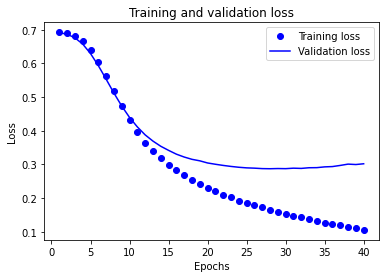

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

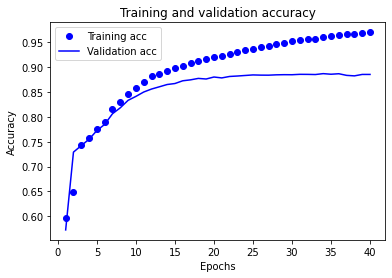

In [0]:
plt.clf()   
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()